In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m 
import seaborn as sns
from sklearn.impute import KNNImputer
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import joblib

In [4]:
df = pd.read_csv('D:/archive (2)/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


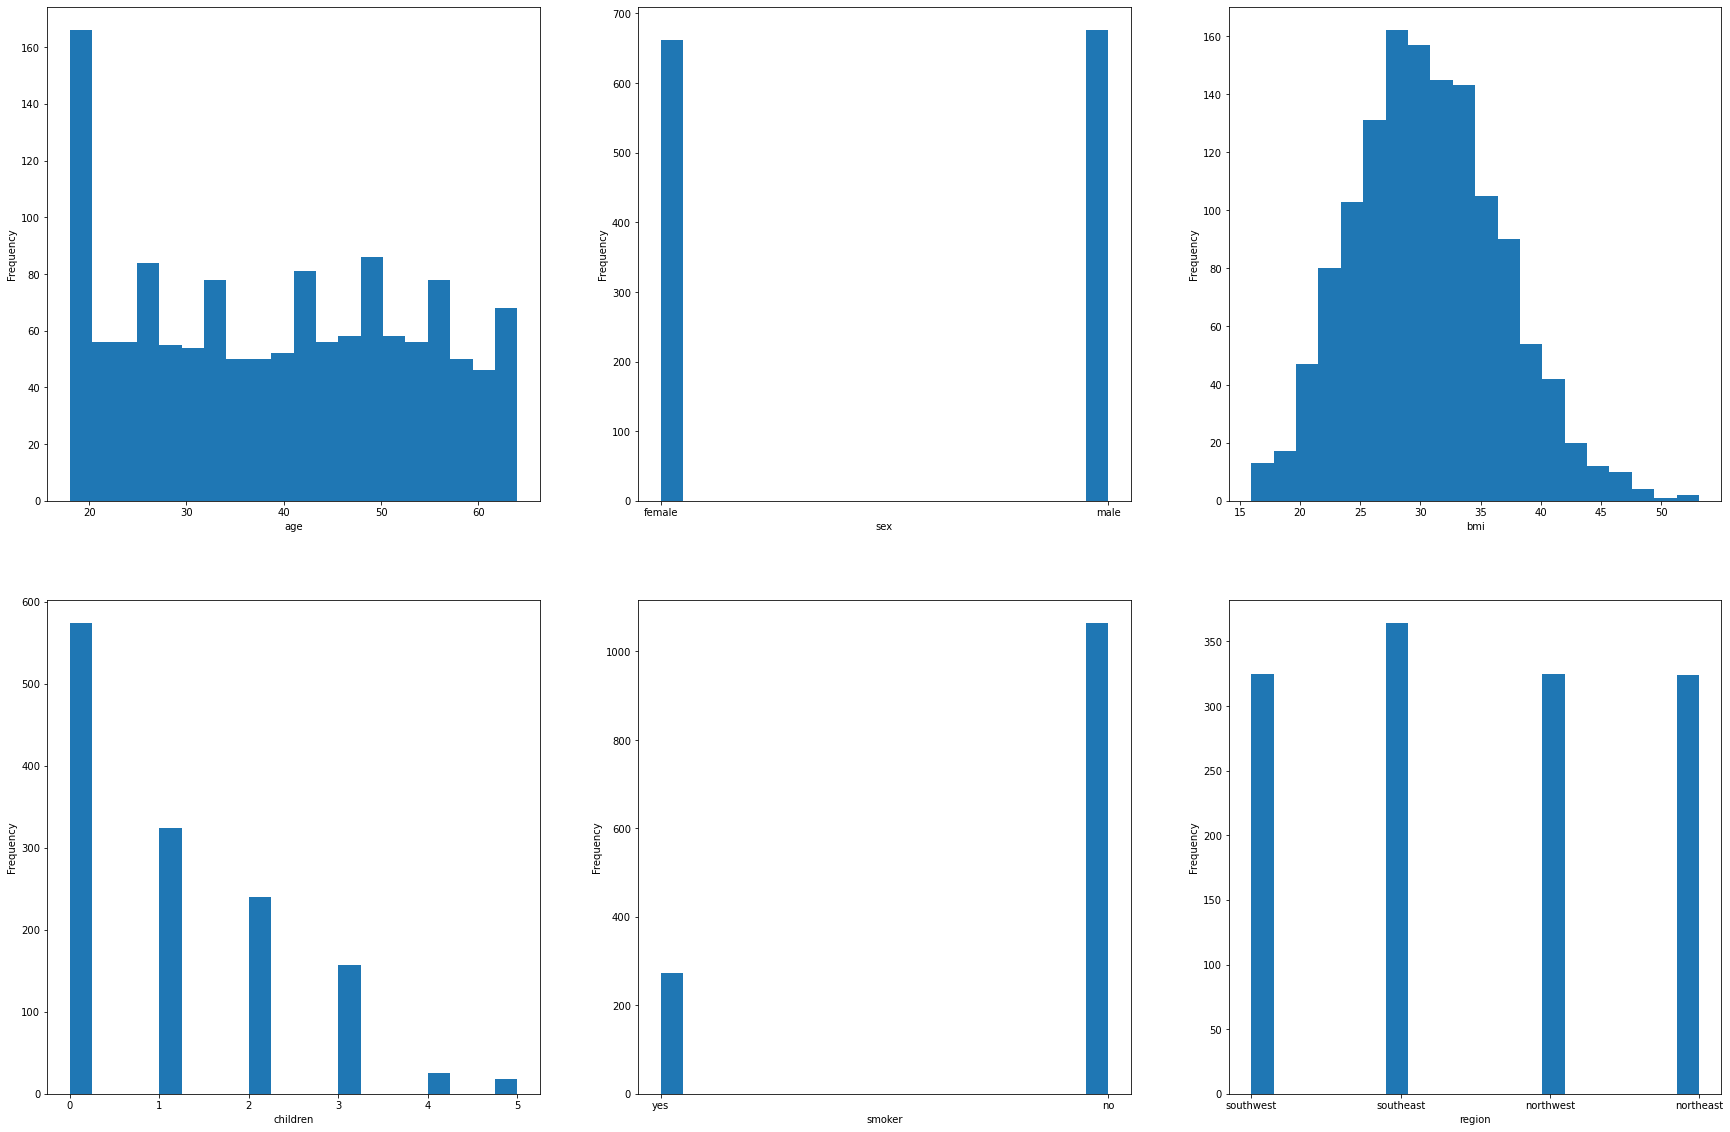

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))

idx = 0
for i in range(2): 
    for j in range(3): 
        colname = list(df.columns)[idx]
        ax[i][j].hist(df[colname], bins=20)
        ax[i][j].set_xlabel(colname)
        ax[i][j].set_ylabel('Frequency')
        
        idx += 1

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

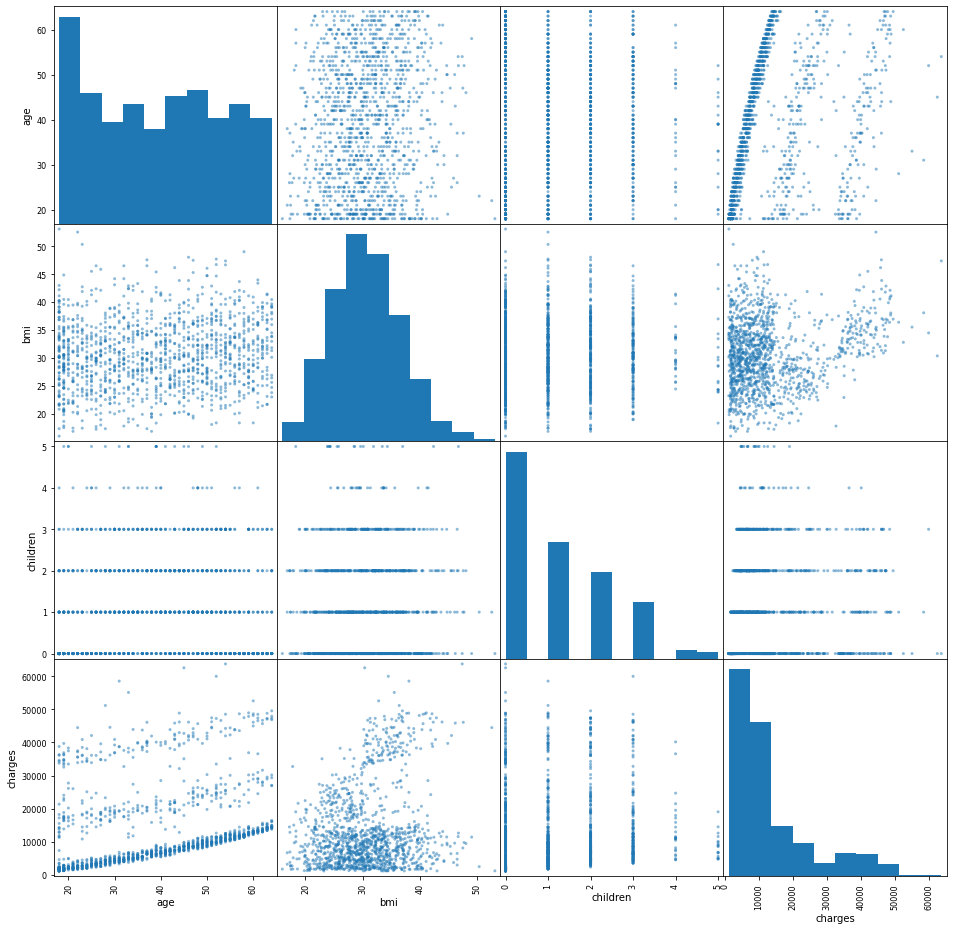

In [6]:
pd.plotting.scatter_matrix(df, figsize=(16, 16))

<AxesSubplot:>

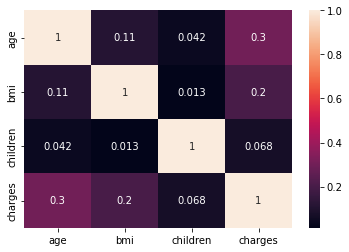

In [5]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

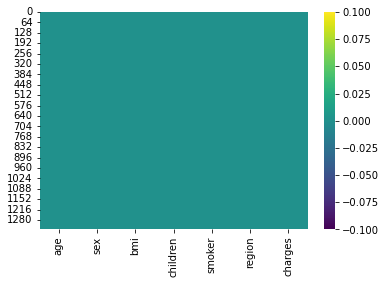

In [8]:
sns.heatmap(df.isnull(),cmap = 'viridis')

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df['sex'] = df['sex'].replace({'female': 0,'male': 1})
df['smoker'] = df['smoker'].replace({'yes': 1,'no': 0})
df['region'] = df['region'].replace({'southeast' : 1,'southwest': 2,'northwest': 3,'northeast': 4})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


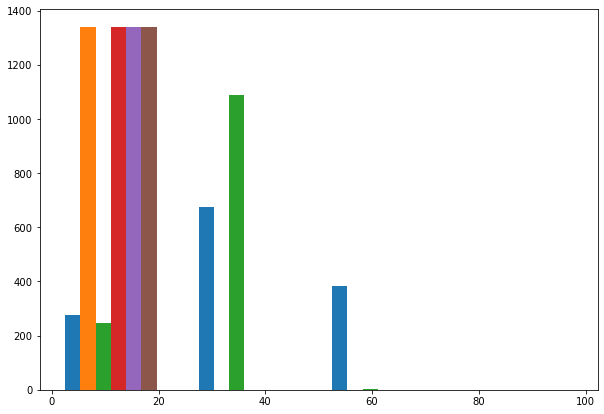

In [13]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df, bins = [0, 25, 50, 75, 100])
plt.show()

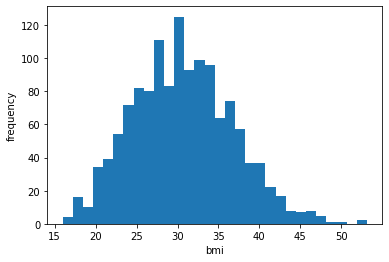

In [14]:
plt.figsize = (10, 10)
plt.hist(df['bmi'], bins=30)
plt.xlabel('bmi')
plt.ylabel('frequency')
plt.show()

(0.0, 66902.8557155)

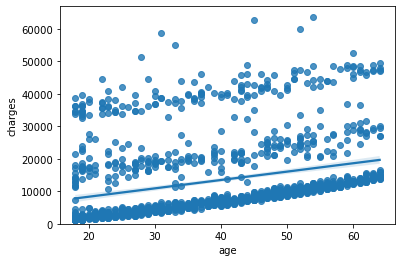

In [15]:
sns.regplot(x = 'age',y = 'charges',data = df)
plt.ylim(0,)

(0.0, 66902.8557155)

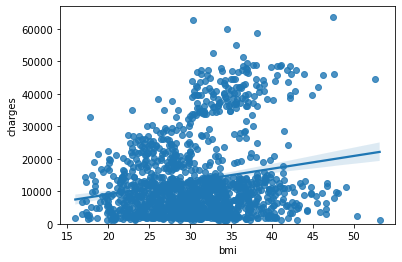

In [16]:
sns.regplot(x = 'bmi',y = 'charges',data = df)
plt.ylim(0,)

In [17]:
for col in df.columns:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))
    
for col in df.columns:
    if col == 'charges':
        pass
    else :
        outliers = detect_outliers(df,0,[col])
        col_median = df[col].median()
        df[col].iloc[outliers] = col_median

number of outliers in age :  0
number of outliers in sex :  0
number of outliers in bmi :  9
number of outliers in children :  0
number of outliers in smoker :  274
number of outliers in region :  0
number of outliers in charges :  139


In [19]:
df.duplicated().sum()

1

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [22]:
scaler = StandardScaler()
columns = ['age','sex','bmi','children','smoker','region']
df[columns] = scaler.fit_transform(df[columns])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,-0.402398,16884.92400
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,-1.287277,1725.55230
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,-1.287277,4449.46200
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,0.482481,21984.47061
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,0.482481,3866.85520


In [24]:
feature_df = df[['age','sex','bmi','children','smoker','region']]
x = np.asarray(feature_df)
y = np.asarray(df['charges'])

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [26]:
log_model = LinearRegression()
log_model.fit(x_train,y_train)
y_pred_lr = log_model.predict(x_test)
r2_score(y_test,y_pred_lr) *100

75.58120362666327

In [27]:
dtree = DecisionTreeRegressor(criterion = 'squared_error',max_depth = 4,min_samples_split=4)
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
r2_score(y_test,y_pred) * 100

84.46542286617698

In [28]:
parameters = {'n_neighbors': [1, 2, 5, 10,m.sqrt(len(x_train))], 'weights': ['uniform', 'distance'], 'metric': ['manhattan', 'euclidean', 'chebyshev']}
def grid_search(estimator, parameters, X, y):
    
    scoring = ['accuracy', 'precision', 'recall']
    kf = KFold(5)
    
    clf = GridSearchCV(estimator, parameters, cv=kf, scoring=scoring, refit="accuracy", n_jobs=-1)
    clf.fit(X, y)
    
    i = clf.best_index_
    best_precision = clf.cv_results_['mean_test_precision'][i]
    best_recall = clf.cv_results_['mean_test_recall'][i]
    
    print('Best score (accuracy): {}'.format(clf.best_score_))
    print('Mean precision: {}'.format(best_precision))
    print('Mean recall: {}'.format(best_recall))
    print('Best parametes: {}'.format(clf.best_params_))
    
    return clf.best_estimator_

In [29]:
grid_search(KNeighborsRegressor(n_jobs=-1),parameters,x_train,y_train)

Best score (accuracy): nan
Mean precision: nan
Mean recall: nan
Best parametes: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 203, in fit
    return self._fit(X, y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 605, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class 'float'> value, ente

KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=1)

In [30]:
knn = KNeighborsRegressor(metric = 'manhattan', n_jobs = -1, n_neighbors = 1,weights = 'uniform')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
r2_score(y_test,y_pred_knn) * 100 

70.40595366172592

In [31]:
k = [1,2,3,4,5,6,7,8,9,int(m.sqrt(len(x_train)))]
for item in k :
    print(f'where k is = {item}')
    model = KNeighborsRegressor(n_neighbors = item)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('accuracy is {}'.format(r2_score(y_test,y_pred)))
    print('-'*30)

where k is = 1
accuracy is 0.6939755438983769
------------------------------
where k is = 2
accuracy is 0.7758213684469426
------------------------------
where k is = 3
accuracy is 0.7863288380875126
------------------------------
where k is = 4
accuracy is 0.7928161449926514
------------------------------
where k is = 5
accuracy is 0.7982912915371264
------------------------------
where k is = 6
accuracy is 0.7951322474707714
------------------------------
where k is = 7
accuracy is 0.8035874521899229
------------------------------
where k is = 8
accuracy is 0.8075688505108245
------------------------------
where k is = 9
accuracy is 0.8089296563261659
------------------------------
where k is = 32
accuracy is 0.781226330313953
------------------------------


In [32]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_score(y_test,y_pred)*100

78.12263303139531

In [48]:
svr = SVR()
params = {'C':[1,5,7] ,'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(svr,param_grid = params,cv = 5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 7, 'kernel': 'linear'}

In [35]:
svr = SVR(C = 7, kernel = 'linear')
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
r2_score(y_test,y_pred_svr) * 100

37.81578570983443

In [36]:
lst = [0.0001,0.001,0.01,0.1,1,2,3,10,20,30,40,50,60]
for i in lst:
    lasso = Lasso(alpha = i)
    lasso.fit(x_train,y_train)
    y_pred = lasso.predict(x_test)
    print('accuracy is : ',r2_score(y_test,y_pred))

accuracy is :  0.7558120343511263
accuracy is :  0.7558120171168395
accuracy is :  0.755811844820791
accuracy is :  0.7558101220594015
accuracy is :  0.7557928674821346
accuracy is :  0.755773483874115
accuracy is :  0.7557540279329991
accuracy is :  0.7556158110184831
accuracy is :  0.7554122099702528
accuracy is :  0.7552013756123667
accuracy is :  0.7549569219152997
accuracy is :  0.7546813714791283
accuracy is :  0.754399409577862


In [37]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
print('accuracy is : ',r2_score(y_test,y_pred))

accuracy is :  0.7558120171168395


In [38]:
lst = [0.0001,0.001,0.01,0.1,1,2,3,10,20,30,40,50,60]
for i in lst:
    ridge = Ridge(alpha = i)
    ridge.fit(x_train,y_train)
    y_pred = ridge.predict(x_test)
    print('accuracy is : ',r2_score(y_test,y_pred))

accuracy is :  0.7558120248079673
accuracy is :  0.7558119216795873
accuracy is :  0.7558108903569556
accuracy is :  0.7558005732482009
accuracy is :  0.7556970147428222
accuracy is :  0.7555811270915777
accuracy is :  0.7554643788402113
accuracy is :  0.754623501686277
accuracy is :  0.753353185929708
accuracy is :  0.7520061905885957
accuracy is :  0.7505873235519196
accuracy is :  0.7491011175417184
accuracy is :  0.7475518473341047


In [40]:
xgb = XGBRegressor(n_estimators = 100 ,max_depth = 10,learning_rate = 0.4)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
r2_score(y_test,y_pred_xgb) *100

82.45003087702905

In [41]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 80, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

gbr_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_search.fit(x_train, y_train)
best_mse = (-1) * gbr_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), gbr_search.best_params_))

Best score: 4482.8072, Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 42}


In [42]:
gbr = GradientBoostingRegressor(learning_rate = 0.05,max_depth = 3,min_samples_leaf = 5,min_samples_split = 2,n_estimators=80,random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
r2_score(y_test,y_pred_gbr) *100

85.32811204767134

In [43]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

rf_search = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_search.fit(x_train, y_train)
best_mse = (-1) * rf_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), rf_search.best_params_))

Best score: 4474.3832, Best params: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}


In [44]:
rf = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 300, random_state = 42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
r2_score(y_test,y_pred_rf) * 100

85.44538622956738

In [45]:
lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'num_leaves': [25, 31, 35],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'random_state': [42]
}

lgbm_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_search.fit(x_train, y_train)
best_mse = (-1) * lgbm_search.best_score_
best_rmse = np.sqrt(best_mse)

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), lgbm_search.best_params_))

Best score: 4472.0606, Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 25, 'random_state': 42}


In [46]:
lgbm = LGBMRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 500, num_leaves = 25, random_state = 42)
lgbm.fit(x_train,y_train)
y_pred_lgbm = lgbm.predict(x_test)
r2_score(y_test,y_pred_lgbm) * 100

85.56761504254635

In [47]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500, 'random_state': 1}

In [48]:
ada = AdaBoostRegressor(learning_rate = 0.001, n_estimators = 500, random_state = 1)
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
r2_score(y_test,y_pred_ada) * 100

84.29711253263955

In [50]:
joblib.dump(lgbm, 'D:/epsilon final project/model.h5')
joblib.dump(scaler, 'D:/epsilon final project/scaler.h5')

['D:/epsilon final project/scaler.h5']